# Deep Neural Network from Scratch: A Step-by-Step Guide

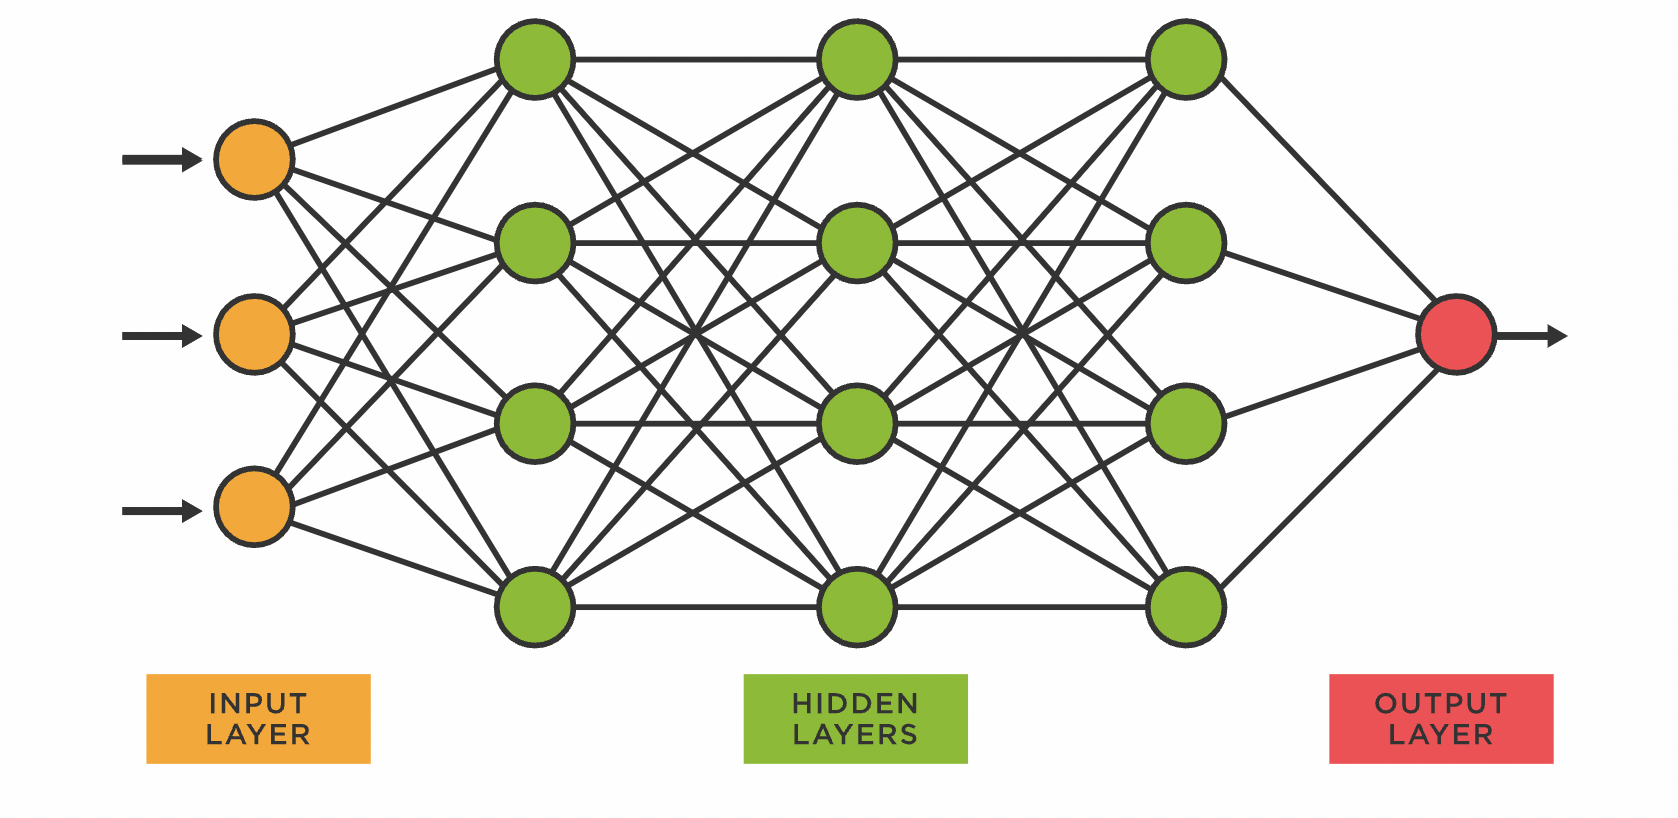

**Table of Contents**

* Data Preparation

* Understanding Activation Functions

 1. ReLU Activation Function

 2. Derivative of ReLU

* Loss Function and Its Derivative

* Forward Propagation

* Backward Propagation

* Initializing Parameters

* Updating Parameters

* Training the Neural Network

* evaluation the model performance

* the advantages and disadvantages of **ReLU** activation in the context of training deep neural networks for regression tasks.

# Generate synthetic data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

n_samples = 10000
X = np.random.uniform(0, 10, (n_samples, 2))
y = 1.5 * X[:, 0] + 2.5 * X[:, 1] + np.random.normal(0, 1.5, n_samples)

dataset = pd.DataFrame({'feature_1': X[:, 0], 'feature_2': X[:, 1], 'target': y})

features = dataset.iloc[:, :-1][:-1].values
labels = dataset.iloc[:, -1][:-1].values.reshape(-1, 1)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Activation Functions

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(int)

def linear_activation(x):
  return x

# Loss Function

In [3]:
def sum_squared_error_loss(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))

def sum_squared_error_derivative(y_true, y_pred):
    return (y_pred - y_true)

# Forward Propagation

In [4]:
def forward_propagation(X, params):
    activations = [X]
    for i in range(len(params) // 2 - 1):
        pre_activation = np.dot(activations[-1], params[f'W{i}']) + params[f'b{i}'].T
        activation = relu(pre_activation)
        activations.append(activation)
    output = np.dot(activations[-1], params[f'W{len(params) // 2 - 1}']) + params[f'b{len(params) // 2 - 1}'].T
    activations.append(output)
    return activations


# Backward Propagation

In [5]:
def backward_propagation(activations, y, params):
    gradients = {}
    error = sum_squared_error_derivative(y, activations[-1])
    for i in reversed(range(len(params) // 2)):
        gradients[f'W{i}'] = np.dot(activations[i].T, error) / error.shape[0]
        gradients[f'b{i}'] = np.mean(error, axis=0, keepdims=True).T
        if i > 0:
            error = np.dot(error, params[f'W{i}'].T) * relu_derivative(activations[i])
    return gradients

# Parameter Initialization

In [6]:
def init_params(layer_dims):
    params = {}
    for i in range(len(layer_dims) - 1):
        params[f'W{i}'] = np.random.randn(layer_dims[i], layer_dims[i + 1]) * 0.01
        params[f'b{i}'] = np.zeros((layer_dims[i + 1], 1))
    return params

# Update Params

In [7]:
def update_params(params, gradients, learning_rate):
    for i in range(len(params) // 2):
        params[f'W{i}'] -= learning_rate * gradients[f'W{i}']
        params[f'b{i}'] -= learning_rate * gradients[f'b{i}']


# Training loop

In [8]:
def train_neural_network(X, y, layer_dims, learning_rate, epochs):
    params = init_params(layer_dims)
    for epoch in range(epochs):
        activations = forward_propagation(X, params)
        loss = sum_squared_error_loss(y, activations[-1])
        gradients = backward_propagation(activations, y, params)
        update_params(params, gradients, learning_rate)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return params


In [9]:
num_hidden_layers = int(input("How many hidden layers would you like? "))
hidden_layer_sizes = [int(input(f"Specify the number of neurons for hidden layer {i + 1}: ")) for i in range(num_hidden_layers)]
learning_rate = float(input("Input the learning rate value: "))
epochs = int(input("Provide the number of epochs for training: "))
layer_dimensions = [X_train.shape[1]] + hidden_layer_sizes + [1]

trained_params = train_neural_network(X_train, y_train, layer_dimensions, learning_rate, epochs)

How many hidden layers would you like? 2
Specify the number of neurons for hidden layer 1: 50
Specify the number of neurons for hidden layer 2: 25
Input the learning rate value: 0.01
Provide the number of epochs for training: 100
Epoch 0, Loss: 3800110.730189976
Epoch 10, Loss: 3210666.254195937
Epoch 20, Loss: 2696122.1621521707
Epoch 30, Loss: 1823663.6514973892
Epoch 40, Loss: 421137.8836708513
Epoch 50, Loss: 309886.53522935975
Epoch 60, Loss: 182098.78117782023
Epoch 70, Loss: 90124.47604411124
Epoch 80, Loss: 54141.31714439855
Epoch 90, Loss: 40494.9947107617


# Testing The Model

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

test_activations = forward_propagation(X_test, trained_params)
y_pred = test_activations[-1]

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 4.5213031881243495
R-squared: 0.9362650998963284


# **what is the advantages and disadvantages of ReLU activation in the context of training deep neural networks for regression tasks ?**

# Advantages of ReLU Activation
* **Simple:** ReLU is easy to compute because it outputs zero for negative inputs and the input itself for positive inputs.

* **Fast:** This simplicity makes calculations faster during training, improving overall efficiency.
* **Sparse Activation:**
Converts negative inputs to zero, leading to a sparser network that can help prevent overfitting.


# Disadvantages of ReLU Activation
* **Dying ReLU Problem:**
If a neuron's inputs are negative, it will output zero and, this means the neuron stops learning and is called a "dead" neuron.

* **Cannot Produce Negative Outputs:**
ReLU only outputs values zero or greater

* **Unbounded Positive Outputs:**
For large positive inputs, ReLU can produce very large outputs, this can lead to numerical instability or make training harder due to exploding gradients.

